In [111]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import manifold
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/train.csv
/kaggle/input/dataset/test.csv


In [112]:
data=pd.read_csv("/kaggle/input/dataset/train.csv")

In [113]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
data_labels=data.label
data=data.drop('label',axis=1)
data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
data_labels.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [116]:
# Count occurrences of each number
occurrences = data_labels.value_counts()
print(occurrences)

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64


In [117]:
scaler=StandardScaler()
df=scaler.fit_transform(data)
df.shape

(42000, 784)

# PCA

In [118]:
pca=decomposition.PCA(n_components=2,random_state=42)

In [119]:
pca_data=pca.fit_transform(df)
pca_data.shape

(42000, 2)

In [120]:
pca_data=np.column_stack((pca_data,data_labels))
pca_data.shape

(42000, 3)

In [121]:
pca_data

array([[-5.14033411, -5.22621962,  1.        ],
       [19.29220813,  6.03231142,  0.        ],
       [-7.64451845, -1.70579369,  1.        ],
       ...,
       [ 0.49541444,  7.07601026,  7.        ],
       [ 2.30725518, -4.34440448,  6.        ],
       [-4.80779726,  1.55884266,  9.        ]])

In [122]:
pca_df=pd.DataFrame(data=pca_data,columns=("X","Y","labels"))

print(pca_df)

               X         Y  labels
0      -5.140334 -5.226220     1.0
1      19.292208  6.032311     0.0
2      -7.644518 -1.705794     1.0
3      -0.474290  5.835751     4.0
4      26.559595  6.024601     0.0
...          ...       ...     ...
41995  13.678863 -1.350154     0.0
41996  -8.869506 -1.187000     1.0
41997   0.495414  7.076010     7.0
41998   2.307255 -4.344404     6.0
41999  -4.807797  1.558843     9.0

[42000 rows x 3 columns]


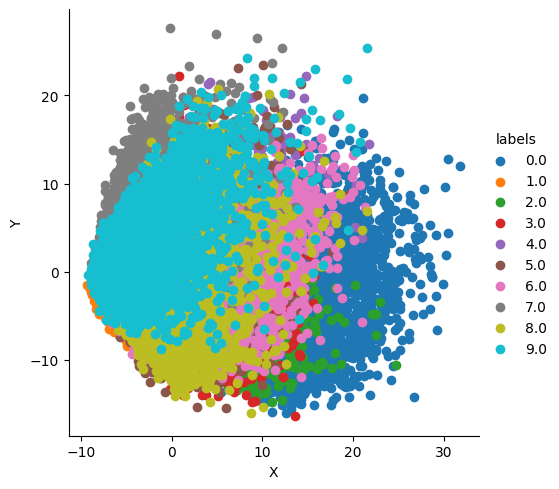

In [125]:
sns.FacetGrid(pca_df,hue="labels",height=5).map(plt.scatter,'X','Y').add_legend()
plt.show()

# Implementation of t-SNE

In [126]:
tsne=manifold.TSNE(n_components=2,random_state=42,verbose=2,n_iter=2000)
transform_data=tsne.fit_transform(df)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 42000 samples in 0.147s...
[t-SNE] Computed neighbors for 42000 samples in 43.308s...
[t-SNE] Computed conditional probabilities for sample 1000 / 42000
[t-SNE] Computed conditional probabilities for sample 2000 / 42000
[t-SNE] Computed conditional probabilities for sample 3000 / 42000
[t-SNE] Computed conditional probabilities for sample 4000 / 42000
[t-SNE] Computed conditional probabilities for sample 5000 / 42000
[t-SNE] Computed conditional probabilities for sample 6000 / 42000
[t-SNE] Computed conditional probabilities for sample 7000 / 42000
[t-SNE] Computed conditional probabilities for sample 8000 / 42000
[t-SNE] Computed conditional probabilities for sample 9000 / 42000
[t-SNE] Computed conditional probabilities for sample 10000 / 42000
[t-SNE] Computed conditional probabilities for sample 11000 / 42000
[t-SNE] Computed conditional probabilities for sample 12000 / 42000
[t-SNE] Computed conditional probabilities for sa

In [127]:
transform_data

array([[ -92.09199  ,  -83.18591  ],
       [ 124.79628  ,  -17.863317 ],
       [-144.20654  ,   -6.9752955],
       ...,
       [ -85.97916  ,  110.42305  ],
       [  86.07154  , -114.31865  ],
       [ -22.43235  ,   91.84656  ]], dtype=float32)

In [128]:
tsne_df=pd.DataFrame(data=np.column_stack((transform_data,data_labels)),columns=["X","Y","labels"])
tsne_df.loc[:,'labels']=tsne_df.labels.astype(int)
print(tsne_df)

                X           Y  labels
0      -92.091988  -83.185913     1.0
1      124.796280  -17.863317     0.0
2     -144.206543   -6.975296     1.0
3       21.756275   96.734604     4.0
4      145.216476   -9.055236     0.0
...           ...         ...     ...
41995  125.310837   34.692738     0.0
41996  -99.990501  -13.582662     1.0
41997  -85.979156  110.423050     7.0
41998   86.071541 -114.318649     6.0
41999  -22.432350   91.846558     9.0

[42000 rows x 3 columns]


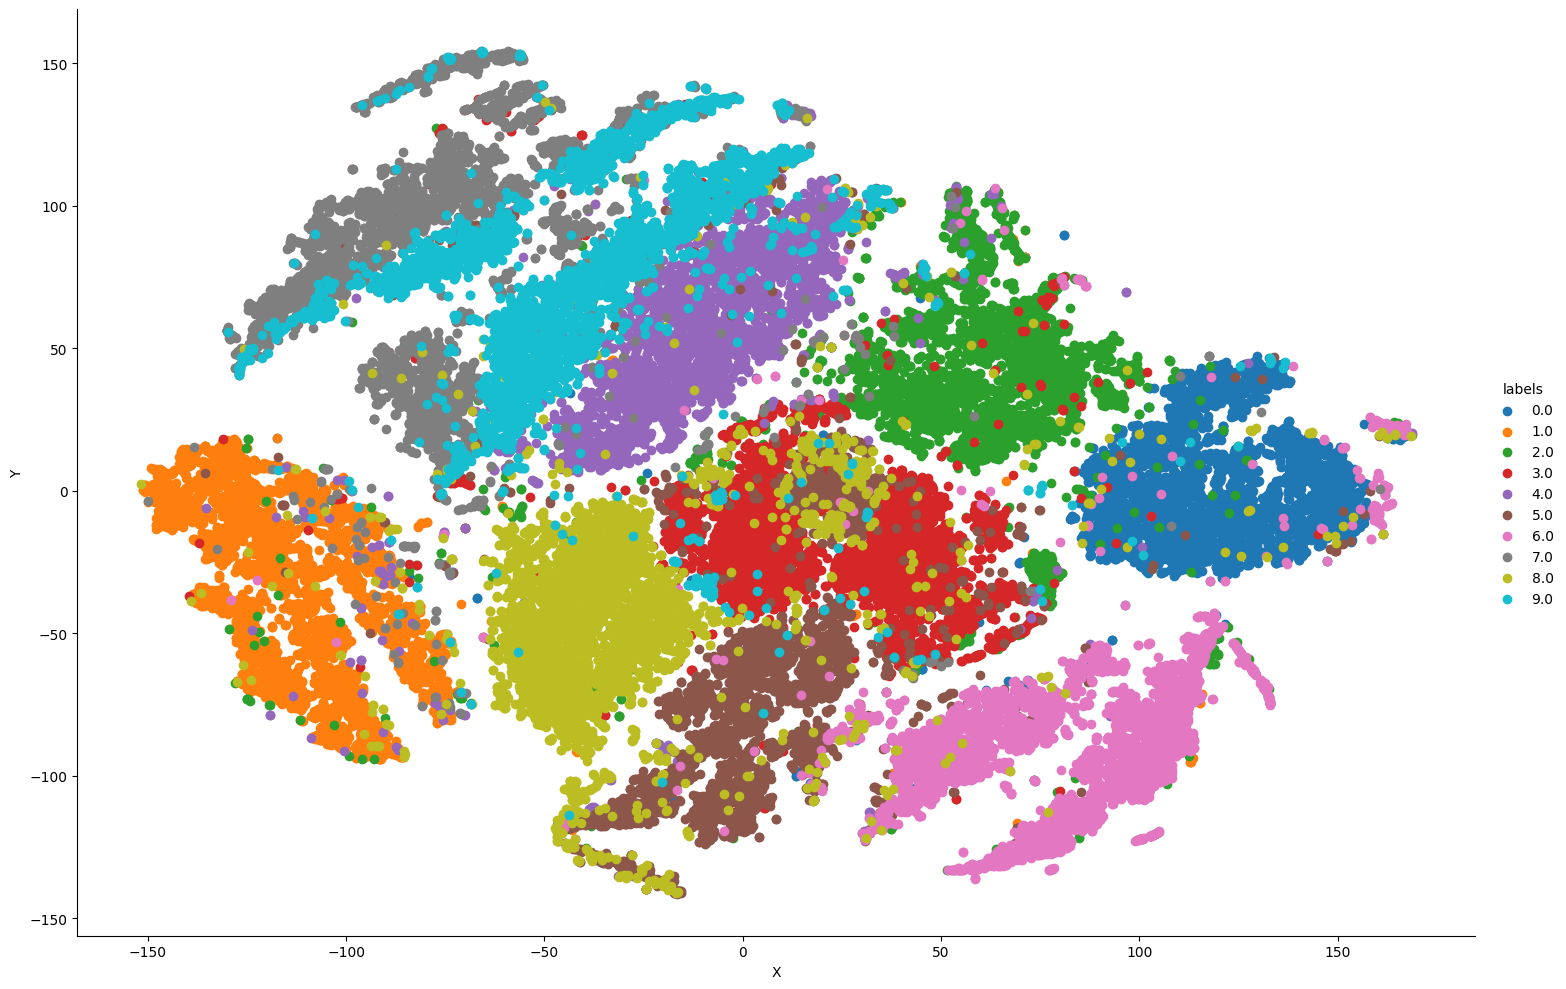

In [129]:
grid = sns.FacetGrid(tsne_df, hue='labels',height=10,aspect=1.5)
grid.map(plt.scatter, 'X', 'Y').add_legend()